# 概要

* 計算物理学入門のP223～P230に掲載されているプログラム md をPythonで再現するためのファイル


In [1]:
import sys
import time
import matplotlib.pyplot as plt

In [2]:
# 変数の宣言

x = [0] * 16
y = [0] * 16
vx = [0] * 16
vy = [0] * 16
ax = [0] * 16
ay = [0] * 16

N = 0
Lx = 0
Ly = 0
dt = 0
dt2 = 0

gcum = []
for i in range(1000):
    gcum.append(i)
nbin = 0
dr = 0
xsave = [0] * 100
ysave = [0] * 100
R2cum = [0] * 100

# 変数の宣言２(グローバルで扱ったほうが良いものを追加している)
t = 0
ke = 0
kecum = 0
pecum = 0
vcum = 0
area = 0
pbc = 0

pe = 0
virial = 0

dx = 0
dy = 0
fx = 0
fy = 0
fxij = 0
fyij = 0
pot = 0

In [3]:
def initial():
    global pbc
    abc = 0
    global dt
    dt = 0.01
    global dt2
    dt= dt * dt
    
    response = ""
    global N
    N = 16
    global Lx
    Lx = 6
    global Ly
    Ly = 6
    
    DATA = [
        1.09,0.98,-0.33,0.78,3.12,5.25,0.12,-1.19
      , 0.08,2.38,-0.08,-0.10,0.54,4.08,-1.94,-0.56
      , 2.52,4.39,0.75,0.34,3.03,2.94,1.70,-1.08
      , 4.25,3.01,0.84,0.47,0.89,3.11,-1.04,0.06
      , 2.76,0.31,1.64,1.36,3.14,1.91,0.38,-1.24
      , 0.23,5.71,-1.58,0.55,1.91,2.46,-1.55,-0.16
      , 4.77,0.96,-0.23,-0.83,5.10,4.63,-0.31,0.65
      , 4.97,5.88,1.18,1.48,3.90,0.20,0.46,-0.51
    ]
    
    global x
    global y
    global vx
    global vy
    
    for i in range(N):
        x[i] = DATA[4*i+0]
        y[i] = DATA[4*i+1]
        vx[i] = DATA[4*i+2]
        vy[i] = DATA[4*i+3]
    
    global ke
    ke = 0
    for i in range(N):
        ke = ke + vx[i]* vx[i] + vy[i]* vy[i]
    ke = 0.5 * ke
    global area
    area = Lx * Ly
    global t
    t = 0
    global kecum
    kecum = 0
    global pecum
    pecum = 0
    global vcum
    vcum = 0    

In [4]:
def separation(ds, L):
    if (ds > 0.5 * L):
        return ds - L
    elif (ds < -0.5 * L):
        return ds + L
    else:
        return ds

In [5]:
def force():
    global dx
    global dy
    global fxij
    global fyij
    global pot
    r2 = dx*dx + dy*dy
    rm2 = 1/r2
    rm6 = rm2 * rm2 * rm2
    f_over_r = 24 * rm6 * (2 * rm6 - 1) * rm2
    fxij = f_over_r * dx
    fyij = f_over_r * dy
    pot = 4 * (rm6 * rm6 - rm6)

In [6]:
def accel():
    global pe
    pe = 0
    global virial
    virial = 0
    global N
    global x
    global y
    global Lx
    global Ly
    global ax
    global ay
    global dx
    global dy
    global pot
    for i in range(N-1):
        for j in range(i+1, N):
            dx = separation(x[i] - x[j], Lx)
            dy = separation(y[i] - y[j], Ly)
            force()
            ax[i] = ax[i] + fxij
            ay[i] = ay[i] + fyij
            ax[j] = ax[j] - fxij
            ay[j] = ay[j] - fyij
            pe = pe + pot
            virial = virial + dx*fxij + dy*fyij
            

In [7]:
def pbc(pos, L):
    if (pos < L):
        return (pos+L)
    elif(pos > L):
        return (pos-L)
    else:
        return (pos)
    

In [8]:
def Verlet():
    global x
    global y
    global vx
    global vy
    global ax
    global ay
    global N
    global Lx
    global Ly
    global dt
    global dt2
    global ke
    global t
    
    for i in range(N):
        xnew = x[i] + vx[i] * dt + 0.5 * ax[i] * dt2
        ynew = y[i] + vy[i] * dt + 0.5 * ay[i] * dt2
        vx[i] = vx[i] + 0.5 * ax[i] * dt
        vy[i] = vy[i] + 0.5 * ay[i] * dt
        x[i] = pbc(xnew, Lx)
        y[i] = pbc(ynew, Ly)
        
    accel()
        
    ke = 0
    for i in range(N):
        vx[i] = vx[i] + 0.5 * ax[i] * dt
        vy[i] = vy[i] + 0.5 * ay[i] * dt
        ke = ke + vx[i] * vx[i] + vy[i] * vy[i]
        ke = 0.5 * ke
        t = t + 1

In [9]:
def show_output():
    global t
    global ke
    global pe
    global virial
    global kecum
    global vcum
    global ncum
    global area
    global N
    global Lx
    global Ly

    print_str = ""
    print_str += "ncum:"+str(ncum)
    print_str += ", t:"+str(t)
    E = ke + pe
    print_str += ", E:"+'{:.3f}'.format(E)
    kecum = kecum + ke
    vcum = vcum + virial
    mean_ke = kecum / ncum
    p = mean_ke + (0.5 * vcum) / ncum
    p = p / area
    print_str += ", mean_ke/N:"+'{:.3f}'.format(mean_ke/N)
    print_str += ", p:"+'{:.3f}'.format(p)
    
    print_str += ", ke:"+'{:.3f}'.format(ke)
    print_str += ", pe:"+'{:.3f}'.format(pe)
    print_str += ", sum(vx):"+'{:.5f}'.format(sum(vx))
    print_str += ", sum(vy):"+'{:.5f}'.format(sum(vy))
    print_str += ", sum(ax):"+'{:.5f}'.format(sum(ax))
    print_str += ", sum(ay):"+'{:.5f}'.format(sum(ay))
    
    print(print_str)
    


ncum:10000, t:160000, E:783291177698600610370158592.000, mean_ke/N:4895569860616253341696.000, p:2175808826940557099008.000, ke:783291177698600610370158592.000, pe:-0.000, sum(vx):-85.39514, sum(vy):-21.35799, sum(ax):-0.00704, sum(ay):0.04565
ncum:20000, t:320000, E:3286237170212716274700517376.000, mean_ke/N:12717276087222865494016.000, p:5652122705432384897024.000, ke:3286237170212716274700517376.000, pe:-0.000, sum(vx):1026.29706, sum(vy):-299.60118, sum(ax):-0.00704, sum(ay):0.04565
ncum:30000, t:480000, E:7510663265172110416591978496.000, mean_ke/N:24125399193923805511680.000, p:10722399641743912861696.000, ke:7510663265172110416591978496.000, pe:-0.000, sum(vx):3412.56832, sum(vy):-577.94893, sum(ax):-0.00704, sum(ay):0.04565
ncum:40000, t:640000, E:13456569462576250322660884480.000, mean_ke/N:39119939180718249213952.000, p:17386639635874777661440.000, ke:13456569462576250322660884480.000, pe:-0.000, sum(vx):5798.47154, sum(vy):-855.82256, sum(ax):-0.00704, sum(ay):0.04565
ncum:

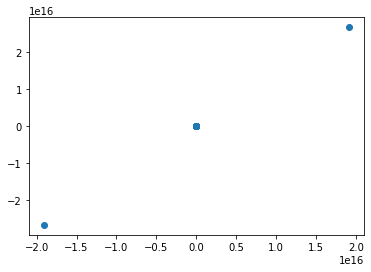

ncum:110000, t:1760000, E:103279355712643174131067518976.000, mean_ke/N:244501391730871826907136.000, p:108667285213720810094592.000, ke:103279355712643174131067518976.000, pe:-0.000, sum(vx):-2997.19442, sum(vy):23015.12952, sum(ax):-0.00704, sum(ay):0.04565
ncum:120000, t:1920000, E:122997102729372627888165093376.000, mean_ke/N:288187266758180740268032.000, p:128083229670302543773696.000, ke:122997102729372627888165093376.000, pe:-0.000, sum(vx):-3172.53316, sum(vy):32736.05902, sum(ax):-0.00704, sum(ay):0.04565
ncum:130000, t:2080000, E:144436329848363932446252597248.000, mean_ke/N:335459558665418740596736.000, p:149093137184630549512192.000, ke:144436329848363932446252597248.000, pe:-0.000, sum(vx):4213.62809, sum(vy):42460.36798, sum(ax):-0.00704, sum(ay):0.04565
ncum:140000, t:2240000, E:167597037069741534929408229376.000, mean_ke/N:386318267452594887589888.000, p:171697007756708853841920.000, ke:167597037069741534929408229376.000, pe:-0.000, sum(vx):11599.78935, sum(vy):52184.67

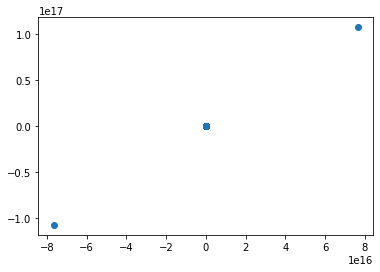

ncum:210000, t:3360000, E:377923430486199651654149603328.000, mean_ke/N:842748901601494180036608.000, p:374555067378441857794048.000, ke:377923430486199651654149603328.000, pe:-0.000, sum(vx):63308.32383, sum(vy):120247.40179, sum(ax):-0.00704, sum(ay):0.04565
ncum:220000, t:3520000, E:414855978526667215325385195520.000, mean_ke/N:922298945428320321273856.000, p:409910642412586824368128.000, ke:414855978526667215325385195520.000, pe:-0.000, sum(vx):70695.01097, sum(vy):129969.78180, sum(ax):-0.00704, sum(ay):0.04565
ncum:230000, t:3680000, E:453510006669521094513874960384.000, mean_ke/N:1005435406135111016513536.000, p:446860180504493800030208.000, ke:453510006669521094513874960384.000, pe:-0.000, sum(vx):78083.69810, sum(vy):139689.32098, sum(ax):-0.00704, sum(ay):0.04565
ncum:240000, t:3840000, E:493885514915145854406549831680.000, mean_ke/N:1092158283721967331704832.000, p:485403681654207680610304.000, ke:493885514915145854406549831680.000, pe:-0.000, sum(vx):74786.38523, sum(vy):14

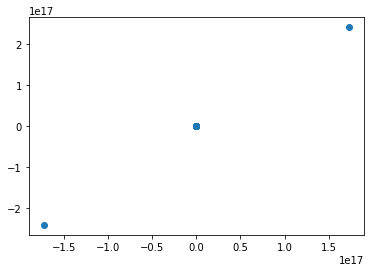

ncum:310000, t:4960000, E:824715515505264976600806457344.000, mean_ke/N:1799638099473861688950784.000, p:799839155321716365852672.000, ke:824715515505264976600806457344.000, pe:-0.000, sum(vx):-13496.99917, sum(vy):217446.53088, sum(ax):-0.00704, sum(ay):0.04565
ncum:320000, t:5120000, E:878862864570781760627698302976.000, mean_ke/N:1915052312101784398069760.000, p:851134360934126339489792.000, ke:878862864570781760627698302976.000, pe:-0.000, sum(vx):-26109.86965, sum(vy):227171.00183, sum(ax):-0.00704, sum(ay):0.04565
ncum:330000, t:5280000, E:934731693738745166185604579328.000, mean_ke/N:2034052941609826011578368.000, p:904023529604367175909376.000, ke:934731693738745166185604579328.000, pe:-0.000, sum(vx):-38722.74038, sum(vy):236887.47278, sum(ax):-0.00704, sum(ay):0.04565


KeyboardInterrupt: 

In [10]:
initial()
accel()
E = ke + pe
ncum = 0
flag = True
while (flag):
#     show_positions(flag)
    Verlet()
    ncum = ncum + 1
    if(ncum % 10000 == 0):
        show_output()
    if(ncum % 100000 == 0):
        plt.scatter(x, y)
        print(f"x:{x}")
        print(f"y:{y}")
        print(f"vx:{vx}")
        print(f"vy:{vy}")
        plt.show()
        

save_config()